In [3]:
%pylab inline
from scipy.optimize import minimize
from scipy.optimize import OptimizeResult
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [4]:
ex3data1 = loadmat('ex3data1.mat')
X, y = ex3data1['X'], ex3data1['y']
# replace 10 class by 0
y[y[:,0] == 10, 0] = 0

# Display Data

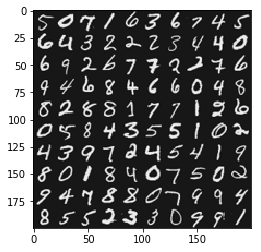

In [5]:
X_copy = X.copy('F')
np.random.shuffle(X_copy)
img = np.reshape(X_copy[:100], (10,10,20,20), 'F').transpose((0,2,1,3)).reshape((200,200))
f = plt.imshow(img, cmap='gray');

## Load Parameters

In [6]:
ex3weights = loadmat('./ex3weights.mat')
t1, t2 = ex3weights['Theta1'], ex3weights['Theta2']
# we swap rows 0 and 9 because of the indexation starting at 1 in matlab...
t2 = np.roll(t2, 1, axis=0)

## Predict

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def feedForward(thetas, X):
    src = X
    for t in thetas:
        src = np.concatenate([np.ones((len(src),1)), src],axis=1)
        src = sigmoid(src.dot(t.T))
    return src

In [9]:
def predict(thetas, X):
    return feedForward(thetas,X).argmax(axis=1)

In [10]:
accuracy = np.mean(predict([t1,t2],X).reshape((-1,1)) == y)
print(f'The network has an accuracy of {accuracy * 100}%')

The network has an accuracy of 97.52%


## Interactive Prediction

In [35]:
%run canvas_widget.ipynb

<IPython.core.display.Javascript object>

HelloWidget()

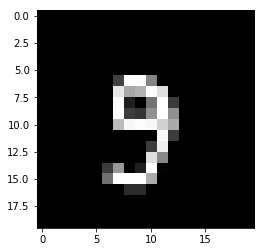

9

In [37]:
pixels = 1 - np.asfortranarray(np.reshape(w.pixels, (20,20)))
plt.imshow(pixels, cmap='gray');
plt.show()
predict([t1,t2], pixels.reshape((1,-1),order='F'))[0]